In [2]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
import pydot
import graphviz
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("J:/501/Test/test 1/data.txt", sep=";")
df.head()

,DATA_TYPE,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,...,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
0,TRAIN,1,1,1,1,39,1,Москва,51,12,...,N,1,0,0,0.0,0,0,0.0,Тульская,-1.00
1,TRAIN,2,1,1,1,50,5,Москва,35,7,...,0,1,1,0,0.0,0,4,0.0,Москва,-0.05
2,TRAIN,3,1,1,1,52,6,Москва,41,6,...,1L,0,0,0,0.0,0,1,12518.0,Московская,-0.07
3,TRAIN,4,1,1,1,50,5,Москва,36,12,...,0,1,1,0,0.0,0,6,15000.0,Москва,0.05
4,TRAIN,5,1,1,0,52,6,Санкт-Петербург,42,5,...,N,0,0,0,0.0,0,0,50000.0,Ленинградская,0.17


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96605 entries, 0 to 96604
Data columns (total 30 columns):
DATA_TYPE                        96605 non-null object
POLICY_ID                        96605 non-null int64
POLICY_BEGIN_MONTH               96605 non-null int64
POLICY_END_MONTH                 96605 non-null int64
POLICY_IS_RENEWED                96605 non-null int64
POLICY_SALES_CHANNEL             96605 non-null int64
POLICY_SALES_CHANNEL_GROUP       96605 non-null int64
POLICY_BRANCH                    96605 non-null object
POLICY_MIN_AGE                   96605 non-null int64
POLICY_MIN_DRIVING_EXPERIENCE    96605 non-null int64
VEHICLE_MAKE                     96605 non-null object
VEHICLE_MODEL                    96605 non-null object
VEHICLE_ENGINE_POWER             96605 non-null float64
VEHICLE_IN_CREDIT                96605 non-null int64
VEHICLE_SUM_INSURED              96605 non-null float64
POLICY_INTERMEDIARY              96605 non-null object
INSURER_GENDER    

In [3]:
sdf = df.set_index(['DATA_TYPE']).sort_index()
sdf.head()

,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_MAKE,...,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
DATA_TYPE,,,,,,,,,,,,,,,,,,,,,
TEST,48303,1,1,0,52,6,Санкт-Петербург,44,1,BMW,...,1S,0,1,0,0.0,0,1,0.0,Санкт-Петербург,0.00
TEST,27162,7,7,0,52,6,Санкт-Петербург,33,2000,Skoda,...,N,0,1,0,0.0,0,0,15000.0,Санкт-Петербург,0.00
TEST,74873,11,11,0,59,3,Санкт-Петербург,36,8,Renault,...,0,0,1,0,0.0,0,3,0.0,Санкт-Петербург,0.09
TEST,27155,7,7,0,53,6,Санкт-Петербург,50,28,Toyota,...,0,0,0,0,0.0,0,2,0.0,Санкт-Петербург,0.00
TEST,27152,7,7,0,52,6,Москва,35,4,Ford,...,0,0,1,0,0.0,0,4,15000.0,Московская,0.02


In [5]:
df_train = sdf.loc['TRAIN']
df_train.head()

,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_MAKE,...,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
DATA_TYPE,,,,,,,,,,,,,,,,,,,,,
TRAIN,63278,5,5,1,55,6,Москва,26,8,Renault,...,0,0,1,0,0.0,0,3,5000.0,Московская,-0.35
TRAIN,67901,9,9,0,55,6,Москва,37,10,Mitsubishi,...,0,0,1,0,0.0,0,1,0.0,Москва,-0.10
TRAIN,63433,8,8,0,52,6,Санкт-Петербург,52,33,Renault,...,0,0,1,0,0.0,0,2,0.0,Ленинградская,-0.49
TRAIN,63966,6,5,1,4,4,Санкт-Петербург,36,14,BMW,...,1S,0,1,0,2.0,0,3,0.0,Санкт-Петербург,-0.19
TRAIN,63348,9,9,1,2,4,Санкт-Петербург,25,6,Skoda,...,0,1,1,0,0.0,0,1,15000.0,Санкт-Петербург,0.14


In [6]:
df = pd.read_csv("J:/501/Test/test 1/data.txt", sep=";")
sdf = df.set_index(['DATA_TYPE']).sort_index()
sdf.head()

,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_MAKE,...,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
DATA_TYPE,,,,,,,,,,,,,,,,,,,,,
TEST,48303,1,1,0,52,6,Санкт-Петербург,44,1,BMW,...,1S,0,1,0,0.0,0,1,0.0,Санкт-Петербург,0.00
TEST,27162,7,7,0,52,6,Санкт-Петербург,33,2000,Skoda,...,N,0,1,0,0.0,0,0,15000.0,Санкт-Петербург,0.00
TEST,74873,11,11,0,59,3,Санкт-Петербург,36,8,Renault,...,0,0,1,0,0.0,0,3,0.0,Санкт-Петербург,0.09
TEST,27155,7,7,0,53,6,Санкт-Петербург,50,28,Toyota,...,0,0,0,0,0.0,0,2,0.0,Санкт-Петербург,0.00
TEST,27152,7,7,0,52,6,Москва,35,4,Ford,...,0,0,1,0,0.0,0,4,15000.0,Московская,0.02


In [7]:
# правда увелкательно - что индекс TEST имеет лишний символ табуляции?
sdf.index

Index(['TEST ', 'TEST ', 'TEST ', 'TEST ', 'TEST ', 'TEST ', 'TEST ', 'TEST ',
       'TEST ', 'TEST ',
       ...
       'TRAIN', 'TRAIN', 'TRAIN', 'TRAIN', 'TRAIN', 'TRAIN', 'TRAIN', 'TRAIN',
       'TRAIN', 'TRAIN'],
      dtype='object', name='DATA_TYPE', length=96605)

In [4]:
df_test = sdf.loc['TEST ']
df_test.head()

,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_MAKE,...,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
DATA_TYPE,,,,,,,,,,,,,,,,,,,,,
TEST,48303,1,1,0,52,6,Санкт-Петербург,44,1,BMW,...,1S,0,1,0,0.0,0,1,0.0,Санкт-Петербург,0.00
TEST,27162,7,7,0,52,6,Санкт-Петербург,33,2000,Skoda,...,N,0,1,0,0.0,0,0,15000.0,Санкт-Петербург,0.00
TEST,74873,11,11,0,59,3,Санкт-Петербург,36,8,Renault,...,0,0,1,0,0.0,0,3,0.0,Санкт-Петербург,0.09
TEST,27155,7,7,0,53,6,Санкт-Петербург,50,28,Toyota,...,0,0,0,0,0.0,0,2,0.0,Санкт-Петербург,0.00
TEST,27152,7,7,0,52,6,Москва,35,4,Ford,...,0,0,1,0,0.0,0,4,15000.0,Московская,0.02


In [9]:
df_train.info(); df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77407 entries, TRAIN to TRAIN
Data columns (total 29 columns):
POLICY_ID                        77407 non-null int64
POLICY_BEGIN_MONTH               77407 non-null int64
POLICY_END_MONTH                 77407 non-null int64
POLICY_IS_RENEWED                77407 non-null int64
POLICY_SALES_CHANNEL             77407 non-null int64
POLICY_SALES_CHANNEL_GROUP       77407 non-null int64
POLICY_BRANCH                    77407 non-null object
POLICY_MIN_AGE                   77407 non-null int64
POLICY_MIN_DRIVING_EXPERIENCE    77407 non-null int64
VEHICLE_MAKE                     77407 non-null object
VEHICLE_MODEL                    77407 non-null object
VEHICLE_ENGINE_POWER             77407 non-null float64
VEHICLE_IN_CREDIT                77407 non-null int64
VEHICLE_SUM_INSURED              77407 non-null float64
POLICY_INTERMEDIARY              77407 non-null object
INSURER_GENDER                   77407 non-null object
POLICY_CLM_N       

In [10]:
df_train.head()

,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_MAKE,...,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
DATA_TYPE,,,,,,,,,,,,,,,,,,,,,
TRAIN,63278,5,5,1,55,6,Москва,26,8,Renault,...,0,0,1,0,0.0,0,3,5000.0,Московская,-0.35
TRAIN,67901,9,9,0,55,6,Москва,37,10,Mitsubishi,...,0,0,1,0,0.0,0,1,0.0,Москва,-0.10
TRAIN,63433,8,8,0,52,6,Санкт-Петербург,52,33,Renault,...,0,0,1,0,0.0,0,2,0.0,Ленинградская,-0.49
TRAIN,63966,6,5,1,4,4,Санкт-Петербург,36,14,BMW,...,1S,0,1,0,2.0,0,3,0.0,Санкт-Петербург,-0.19
TRAIN,63348,9,9,1,2,4,Санкт-Петербург,25,6,Skoda,...,0,1,1,0,0.0,0,1,15000.0,Санкт-Петербург,0.14


In [ ]:
# окей. я сижу на ралоченном квадкоре и 14 гигах оперативы - но kNN уже двараза не поcчиталась, давайте смотреть почему.

In [11]:
df_train['POLICY_IS_RENEWED'] = df_train['POLICY_IS_RENEWED'].astype('int')
y = df_train['POLICY_IS_RENEWED']

In [12]:
df_train.drop(['POLICY_BRANCH','VEHICLE_MAKE','CLIENT_REGISTRATION_REGION', 'POLICY_IS_RENEWED', 'VEHICLE_MODEL'], axis=1, inplace=True)
df_train.head()

,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_ENGINE_POWER,VEHICLE_IN_CREDIT,VEHICLE_SUM_INSURED,...,POLICY_PRV_CLM_N,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,POLICY_PRICE_CHANGE
DATA_TYPE,,,,,,,,,,,,,,,,,,,,,
TRAIN,63278,5,5,55,6,26,8,135.0,0,412089.0,...,0,0,0,1,0,0.0,0,3,5000.0,-0.35
TRAIN,67901,9,9,55,6,37,10,140.0,1,806872.0,...,0,0,0,1,0,0.0,0,1,0.0,-0.10
TRAIN,63433,8,8,52,6,52,33,102.0,1,440413.0,...,0,0,0,1,0,0.0,0,2,0.0,-0.49
TRAIN,63966,6,5,4,4,36,14,238.0,1,1675000.0,...,2,1S,0,1,0,2.0,0,3,0.0,-0.19
TRAIN,63348,9,9,2,4,25,6,180.0,0,845000.0,...,2,0,1,1,0,0.0,0,1,15000.0,0.14


In [161]:
df_train['POLICY_INTERMEDIARY'] = pd.factorize(df_train['POLICY_INTERMEDIARY'])[0]
df_train['INSURER_GENDER'] = pd.factorize(df_train['INSURER_GENDER'])[0]

df_train['POLICY_CLM_N'] = pd.factorize(df_train['POLICY_CLM_N'])[0]
df_train['POLICY_PRV_CLM_N'] = pd.factorize(df_train['POLICY_PRV_CLM_N'])[0]

df_train['POLICY_PRV_CLM_GLT_N'] = pd.factorize(df_train['POLICY_PRV_CLM_GLT_N'])[0]
df_train['POLICY_CLM_GLT_N'] = pd.factorize(df_train['POLICY_CLM_GLT_N'])[0]
df_train['POLICY_YEARS_RENEWED_N'] = pd.factorize(df_train['POLICY_YEARS_RENEWED_N'])[0]

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77407 entries, TRAIN to TRAIN
Data columns (total 24 columns):
POLICY_ID                        77407 non-null int64
POLICY_BEGIN_MONTH               77407 non-null int64
POLICY_END_MONTH                 77407 non-null int64
POLICY_SALES_CHANNEL             77407 non-null int64
POLICY_SALES_CHANNEL_GROUP       77407 non-null int64
POLICY_MIN_AGE                   77407 non-null int64
POLICY_MIN_DRIVING_EXPERIENCE    77407 non-null int64
VEHICLE_ENGINE_POWER             77407 non-null float64
VEHICLE_IN_CREDIT                77407 non-null int64
VEHICLE_SUM_INSURED              77407 non-null float64
POLICY_INTERMEDIARY              77407 non-null int64
INSURER_GENDER                   77407 non-null int64
POLICY_CLM_N                     77407 non-null int64
POLICY_CLM_GLT_N                 77407 non-null int64
POLICY_PRV_CLM_N                 77407 non-null int64
POLICY_PRV_CLM_GLT_N             77407 non-null int64
CLIENT_HAS_DAGO         

In [15]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

X_train, X_holdout, y_train, y_holdout = train_test_split(df_train.values, y, test_size=0.3,
random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [16]:
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [17]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [18]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred) # 0.69

0.68492442836842782

In [19]:
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred) # 0.55

0.55496705851957107

In [20]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [21]:
tree_params = {'max_depth': range(1,11),
'max_features': range(4,25)}

In [22]:
tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

In [23]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(4, 25)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [24]:
# ну и что у нас получилось на первом (четвёртом) прогоне? 
# нужно было сразу признать что в таком виде голосования не будет.
# зато пока kNN защивается можно много унзать всякого интересного.

tree_grid.best_params_

{'max_depth': 7, 'max_features': 23}

In [25]:
tree_grid.best_score_

0.69607264137014613

In [26]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.69190027128277998

In [27]:
tree_params = {'max_depth': range(1,7),
'max_features': range(4,23)}

In [28]:
tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

In [29]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 114 candidates, totalling 570 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 570 out of 570 | elapsed:   37.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 7), 'max_features': range(4, 23)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [30]:
tree_grid.best_params_

{'max_depth': 6, 'max_features': 21}

In [31]:
tree_grid.best_score_

0.68926251291894292

In [32]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.68548421823192529

In [33]:
# ну. не очень. необходимость включать голову никто не отменял.
# поэтому в 4ый раз непесобрав датафрейм я запускать это не буду.
# без статистических фильтров и преобразования данных они не проголосуют - точности не хватит.
# отвечаю на вопрос - а зачем я вообщ это делаю, а за тем что ещё в пятницу у меня появилась идея на счёт происходящего.
# и сейчас я хочу посмотреть как логика машины отличаеться от моей и на какую точность эта логика опирается. лес расскажет.


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [34]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

In [35]:
knn_params = {'knn__n_neighbors': range(1, 7)}

In [36]:
knn_grid = GridSearchCV(knn_pipe, knn_params,
cv=5, n_jobs=-1,
verbose=True)

In [ ]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [34]:
# Fitting 5 folds for each of 6 candidates, totalling 30 fits - все голосовали против всех видимо и зациклились.
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))

0.706389407108


In [35]:
forest_params = {'max_depth': range(1,11),
'max_features': range(4,19)}

In [36]:
forest_grid = GridSearchCV(forest, forest_params,
cv=5, n_jobs=-1,
verbose=True)

In [37]:
forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 34.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=17,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(4, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [38]:
forest_grid.best_params_, forest_grid.best_score_ 

({'max_depth': 10, 'max_features': 13}, 0.70792115753728035)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.370144 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.370144 to fit



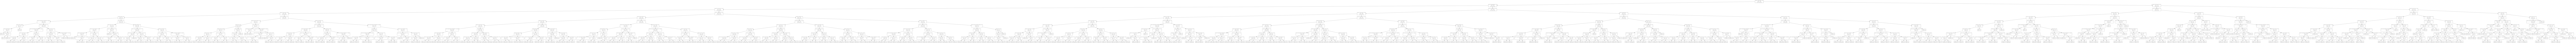

In [40]:
import os
os.environ["PATH"] += os.pathsep + 'J:/HiEnd/StandAloneComplex/Library/bin/graphviz'

from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=17)
clf_tree.fit(df_train, y)

from sklearn import tree
from IPython.display import Image 
import pydotplus

dot_data = tree.export_graphviz(clf_tree, feature_names=df.columns, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf('df_train_IM.pdf') 
graph.write_png('df_train_IM.png') 
Image(graph.create_png()) 

# окей. в принципе у меня есть лупа. 
# будем считать что в DOT я не умею.

In [ ]:
# Бла бла бла я делаю выводы о том какой признак критически главный, но, давайте серьёзно 
# к Импи такую точность, здесь нужны фильтры, лабелэкодер, даммись и много чего ещё.
# выкючаем машиниста - включаем визуальный анализ и выбираем важные признаки.

In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19198 entries, TEST  to TEST 
Data columns (total 29 columns):
POLICY_ID                        19198 non-null int64
POLICY_BEGIN_MONTH               19198 non-null int64
POLICY_END_MONTH                 19198 non-null int64
POLICY_IS_RENEWED                19198 non-null int64
POLICY_SALES_CHANNEL             19198 non-null int64
POLICY_SALES_CHANNEL_GROUP       19198 non-null int64
POLICY_BRANCH                    19198 non-null object
POLICY_MIN_AGE                   19198 non-null int64
POLICY_MIN_DRIVING_EXPERIENCE    19198 non-null int64
VEHICLE_MAKE                     19198 non-null object
VEHICLE_MODEL                    19198 non-null object
VEHICLE_ENGINE_POWER             19198 non-null float64
VEHICLE_IN_CREDIT                19198 non-null int64
VEHICLE_SUM_INSURED              19198 non-null float64
POLICY_INTERMEDIARY              19198 non-null object
INSURER_GENDER                   19198 non-null object
POLICY_CLM_N       

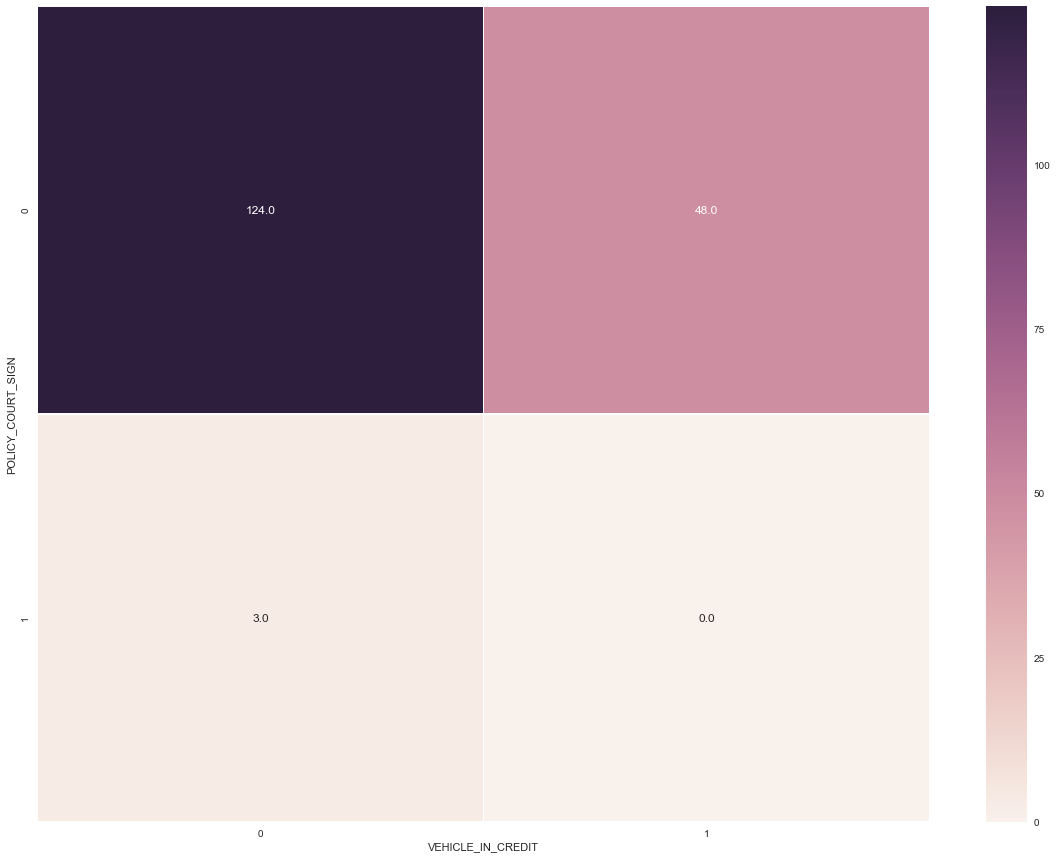

In [46]:
from pylab import rcParams    
rcParams['figure.figsize'] = 20, 15
heat_map_native_country = df_test.pivot_table(
                        index='POLICY_COURT_SIGN', 
                        columns='VEHICLE_IN_CREDIT', 
                        values='POLICY_HAS_COMPLAINTS', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(heat_map_native_country, annot=True, fmt=".1f", linewidths=.5)

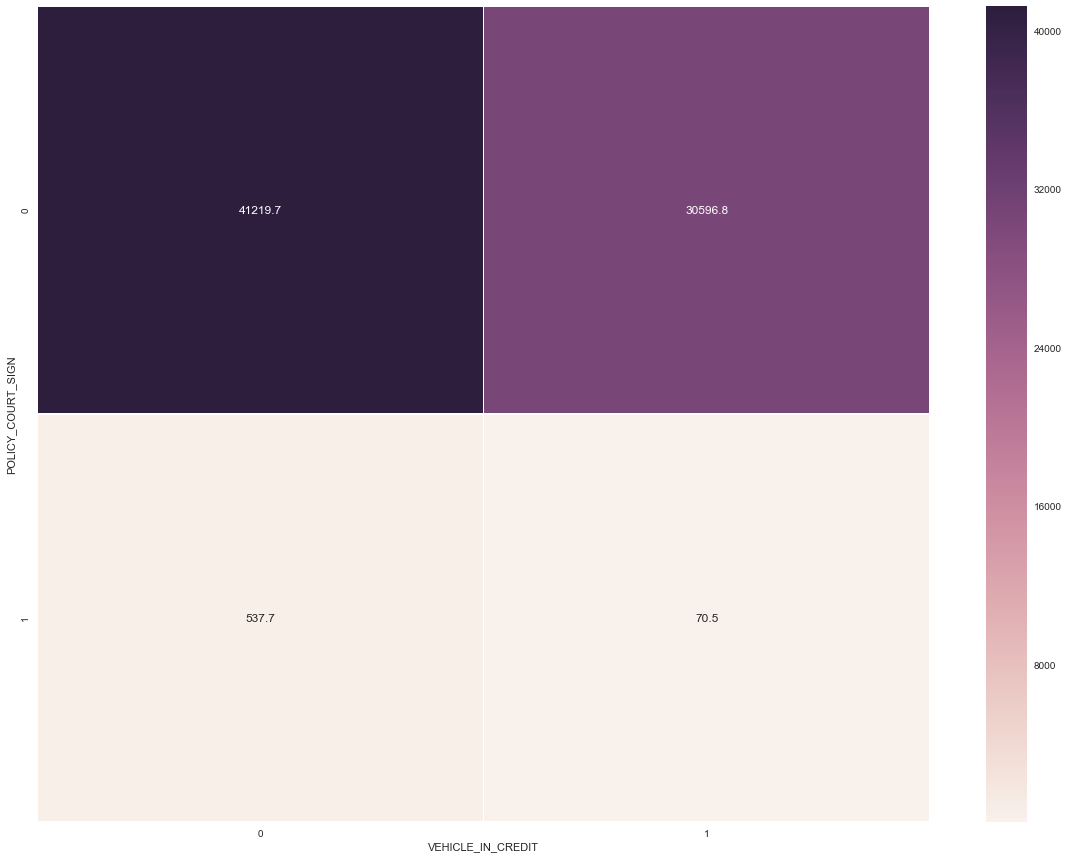

In [47]:
heat_map_native_country = df_test.pivot_table(
                        index='POLICY_COURT_SIGN', 
                        columns='VEHICLE_IN_CREDIT', 
                        values='CLAIM_AVG_ACC_ST_PRD', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(heat_map_native_country, annot=True, fmt=".1f", linewidths=.5)

In [149]:
df_test['POLICY_INTERMEDIARY'] = pd.factorize(df_test['POLICY_INTERMEDIARY'])[0]
df_test['INSURER_GENDER'] = pd.factorize(df_test['INSURER_GENDER'])[0]

df_test['POLICY_CLM_N'] = pd.factorize(df_test['POLICY_CLM_N'])[0]
df_test['POLICY_PRV_CLM_N'] = pd.factorize(df_test['POLICY_PRV_CLM_N'])[0]

df_test['POLICY_PRV_CLM_GLT_N'] = pd.factorize(df_test['POLICY_PRV_CLM_GLT_N'])[0]
df_test['POLICY_CLM_GLT_N'] = pd.factorize(df_test['POLICY_CLM_GLT_N'])[0]
df_test['POLICY_YEARS_RENEWED_N'] = pd.factorize(df_test['POLICY_YEARS_RENEWED_N'])[0]

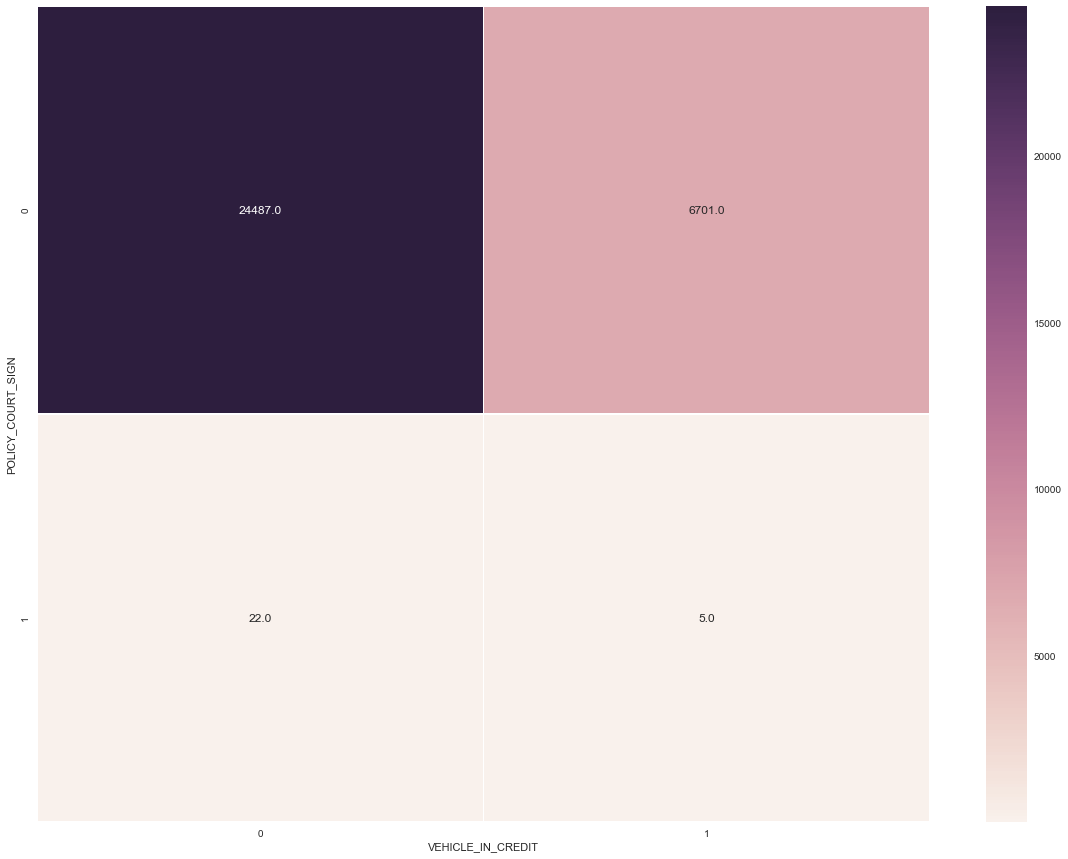

In [51]:
heat_map_policy_renewed_n= df_test.pivot_table(
                        index='POLICY_COURT_SIGN', 
                        columns='VEHICLE_IN_CREDIT', 
                        values='POLICY_YEARS_RENEWED_N', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(heat_map_policy_renewed_n, annot=True, fmt=".1f", linewidths=.5)

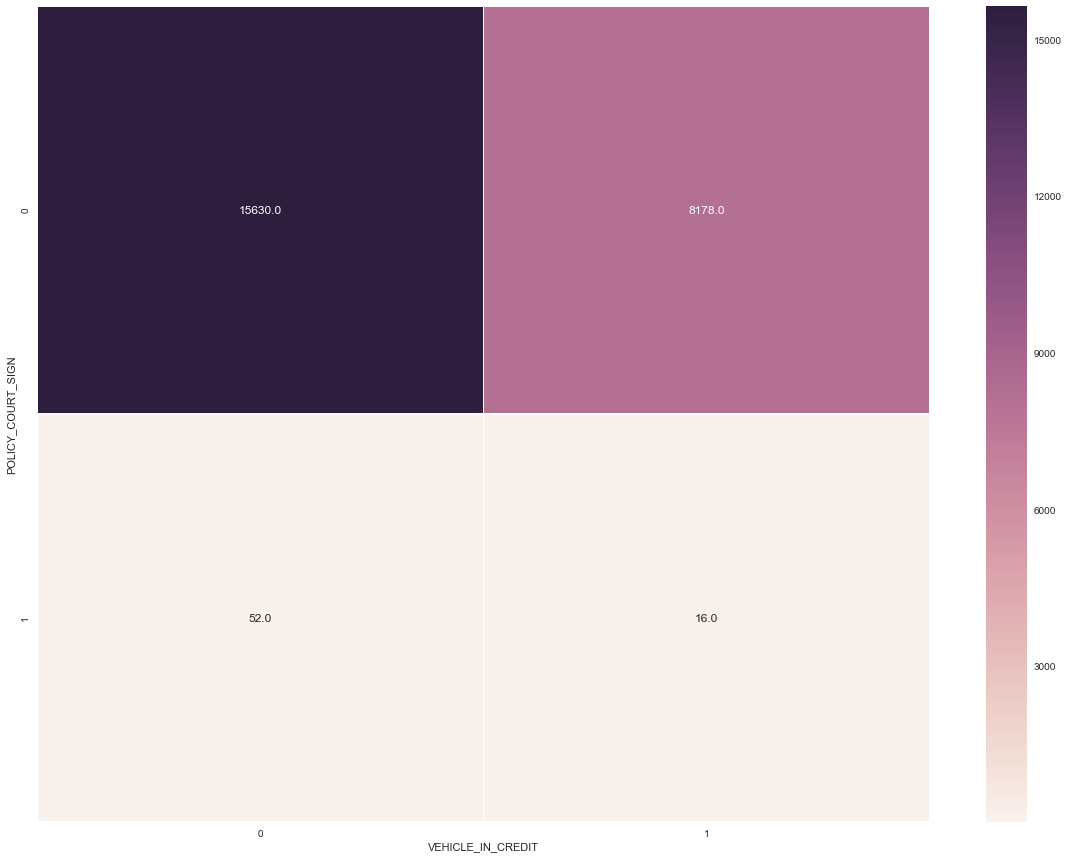

In [52]:
heat_map_policy_clm_n = df_test.pivot_table(
                        index='POLICY_COURT_SIGN', 
                        columns='VEHICLE_IN_CREDIT', 
                        values='POLICY_CLM_N', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(heat_map_policy_clm_n, annot=True, fmt=".1f", linewidths=.5)

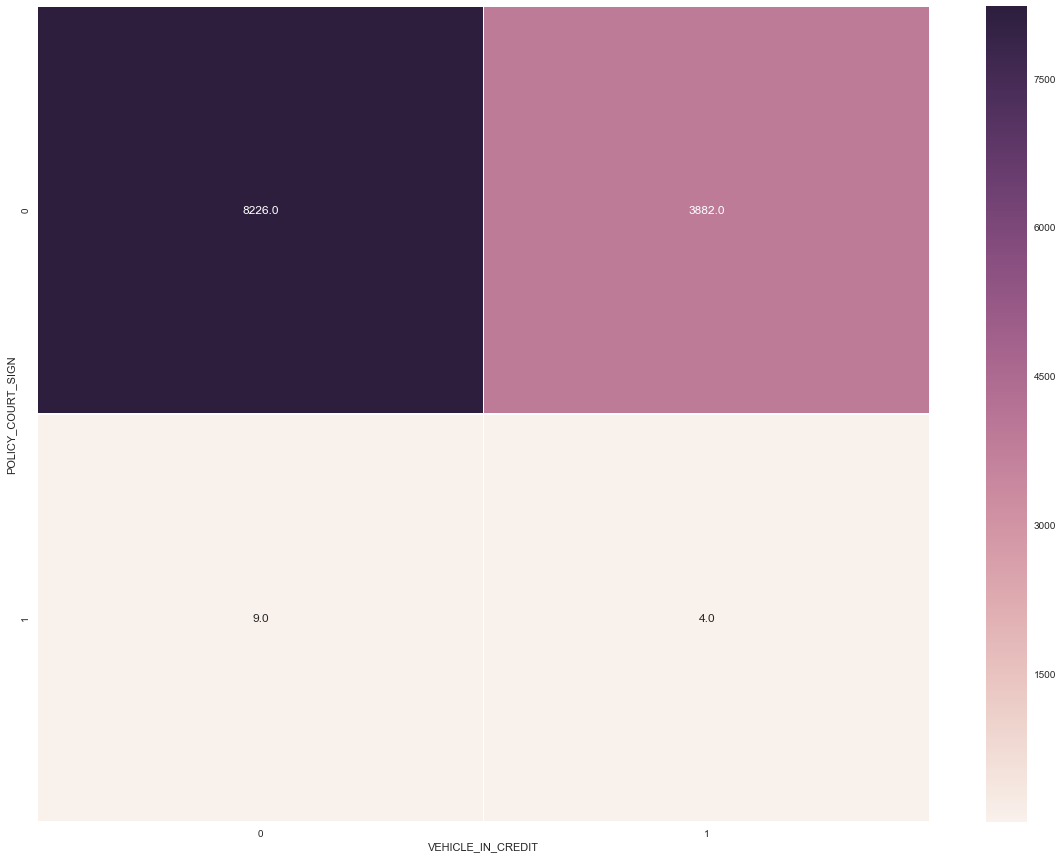

In [53]:
heat_map_insurer_gender = df_test.pivot_table(
                        index='POLICY_COURT_SIGN', 
                        columns='VEHICLE_IN_CREDIT', 
                        values='INSURER_GENDER', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(heat_map_insurer_gender, annot=True, fmt=".1f", linewidths=.5)

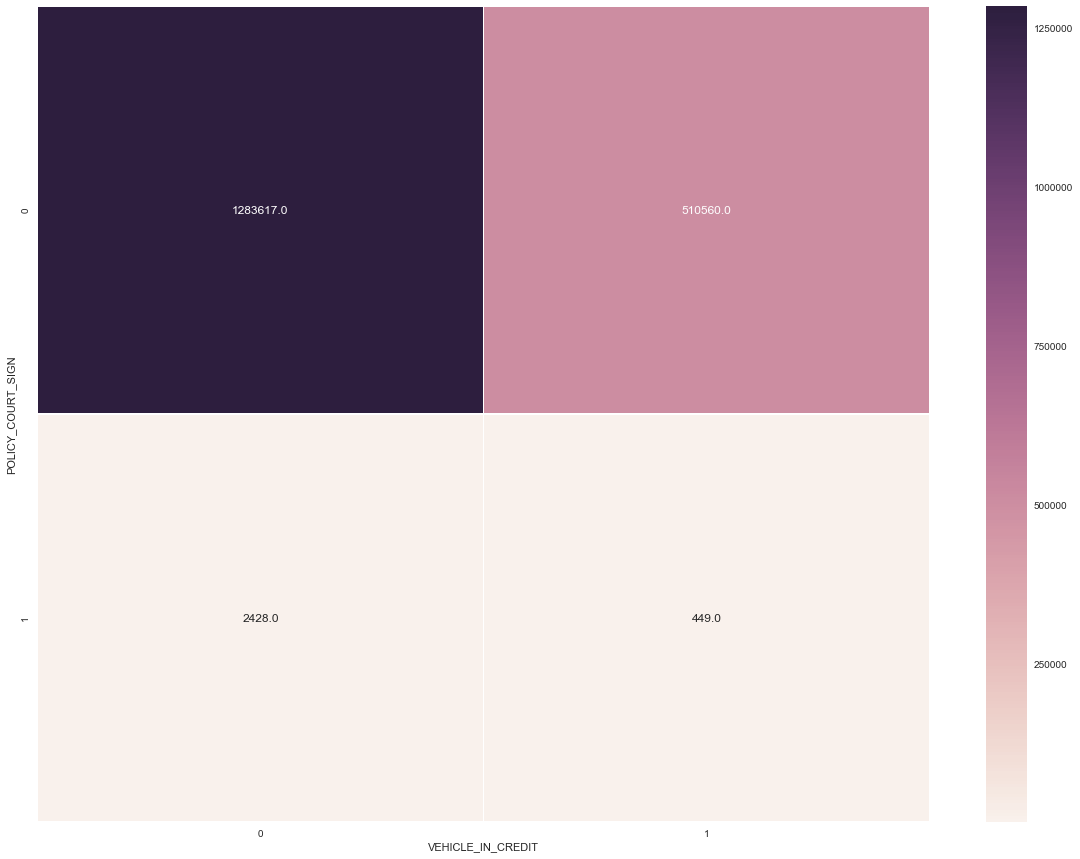

In [54]:
heat_map_policy_intermediary = df_test.pivot_table(
                        index='POLICY_COURT_SIGN', 
                        columns='VEHICLE_IN_CREDIT', 
                        values='POLICY_INTERMEDIARY', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(heat_map_policy_intermediary, annot=True, fmt=".1f", linewidths=.5)

In [58]:
for c in df_test.columns:
    n = df[c].nunique()
    print(c)
    
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

POLICY_ID
96605
----------
POLICY_BEGIN_MONTH
12
----------
POLICY_END_MONTH
12
----------
POLICY_IS_RENEWED
2 [(0, 48229), (1, 48376)]
----------
POLICY_SALES_CHANNEL
63
----------
POLICY_SALES_CHANNEL_GROUP
8
----------
POLICY_BRANCH
2 [('Москва', 50697), ('Санкт-Петербург', 45908)]
----------
POLICY_MIN_AGE
68
----------
POLICY_MIN_DRIVING_EXPERIENCE
112
----------
VEHICLE_MAKE
83
----------
VEHICLE_MODEL
549
----------
VEHICLE_ENGINE_POWER
347
----------
VEHICLE_IN_CREDIT
2 [(0, 65503), (1, 31102)]
----------
VEHICLE_SUM_INSURED
44638
----------
POLICY_INTERMEDIARY
1406
----------
INSURER_GENDER
2 [('F', 35561), ('M', 61044)]
----------
POLICY_CLM_N
7
----------
POLICY_CLM_GLT_N
7
----------
POLICY_PRV_CLM_N
7
----------
POLICY_PRV_CLM_GLT_N
7
----------
CLIENT_HAS_DAGO
2 [(0, 69799), (1, 26806)]
----------
CLIENT_HAS_OSAGO
2 [(0, 43443), (1, 53162)]
----------
POLICY_COURT_SIGN
2 [(0, 96507), (1, 98)]
----------
CLAIM_AVG_ACC_ST_PRD
709
----------
POLICY_HAS_COMPLAINTS
2 [(0, 9586

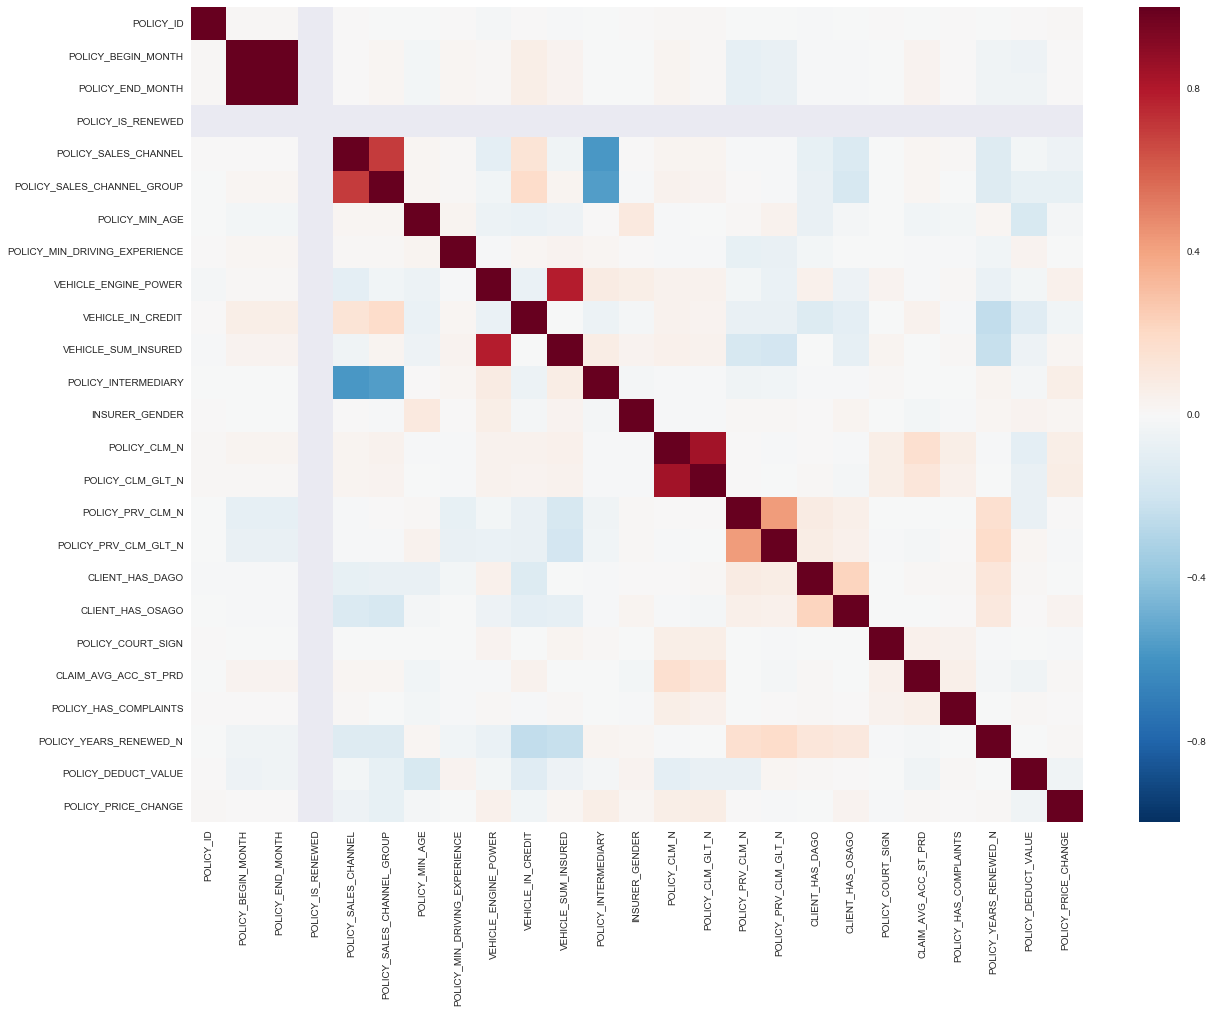

In [59]:
correlation = df_test.corr('pearson')
sns.heatmap(correlation)

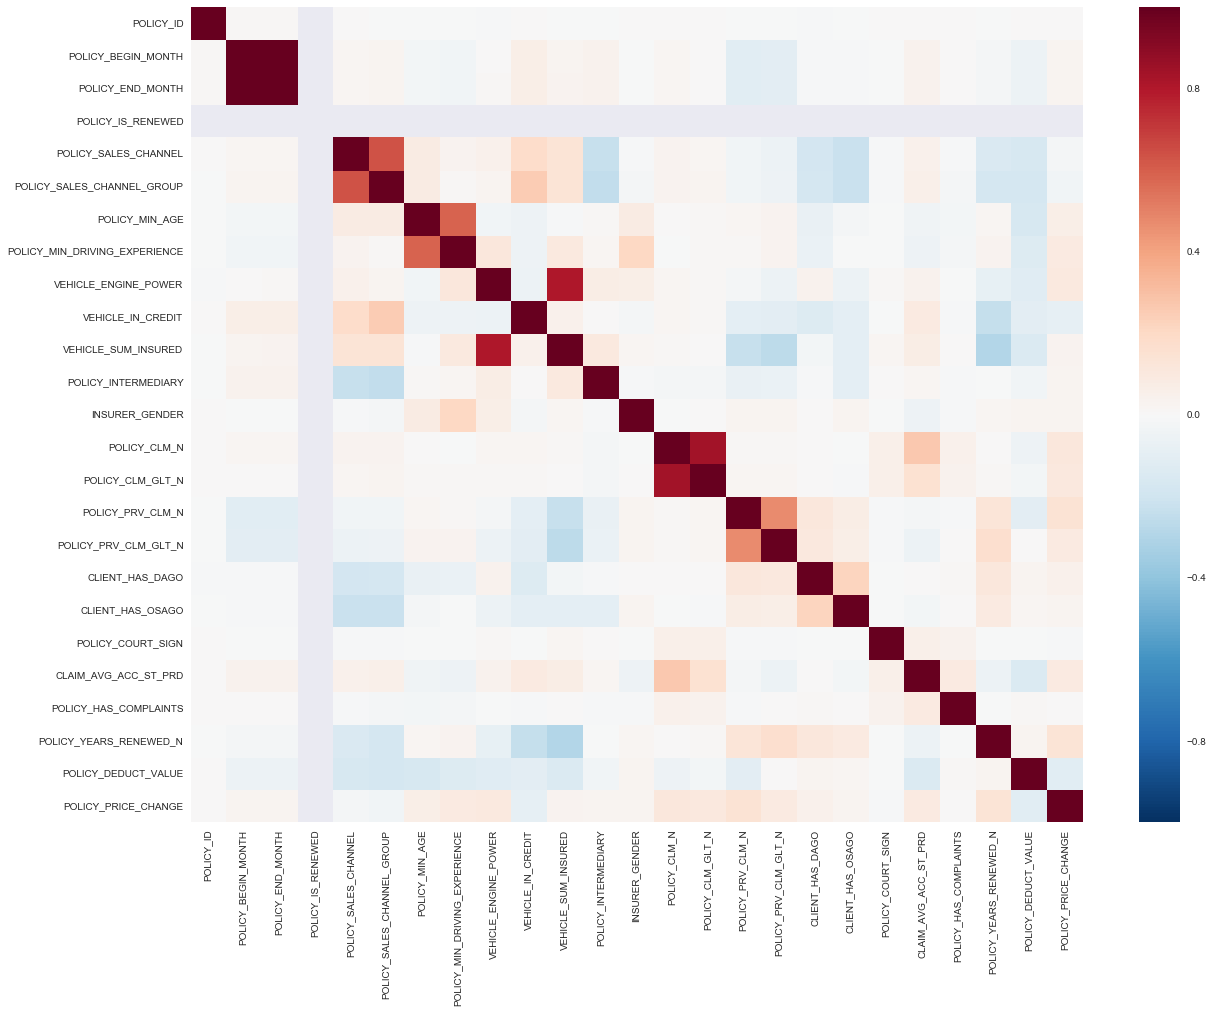

In [60]:
corr_matrix = df_test.corr('spearman')
sns.heatmap(corr_matrix)

In [61]:
from scipy.stats import pearsonr
court = df_test['POLICY_COURT_SIGN']
credit = df_test['VEHICLE_IN_CREDIT']
r,p = pearsonr(court, credit)
r,p

(-0.0039986804879353528, 0.5795715216665005)

In [63]:
court = df_test['POLICY_COURT_SIGN']
age = df_test['POLICY_MIN_DRIVING_EXPERIENCE']
r,p = pearsonr(court, age)
r,p

(-0.0034066407508014261, 0.63693818171690486)

In [64]:
court = df_test['POLICY_COURT_SIGN']
osago = df_test['CLIENT_HAS_OSAGO']
r,p = pearsonr(court, osago)
r,p

(-0.00040214571307925652, 0.95556772140808421)

In [66]:
court = df_test['POLICY_COURT_SIGN']
dago = df_test['CLIENT_HAS_DAGO']
r,p = pearsonr(court, dago)
r,p

(-0.0042306919440699402, 0.55777082597119021)

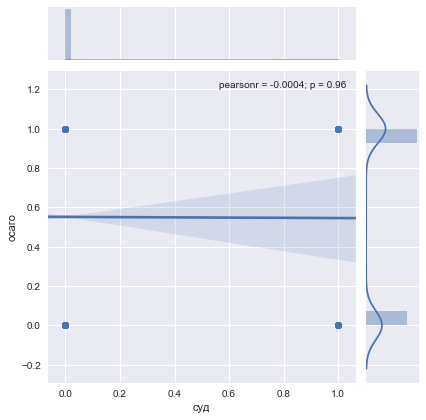

In [68]:
sns.jointplot(x='POLICY_COURT_SIGN', y='CLIENT_HAS_OSAGO', data=df_test, kind='reg');
# подпишем оси координат
plt.xlabel("суд");
plt.ylabel("осаго");
plt.show();

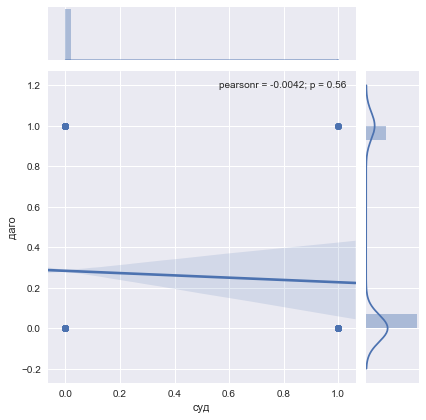

In [69]:
sns.jointplot(x='POLICY_COURT_SIGN', y='CLIENT_HAS_DAGO', data=df_test, kind='reg');
# подпишем оси координат
plt.xlabel("суд");
plt.ylabel("даго");
plt.show();

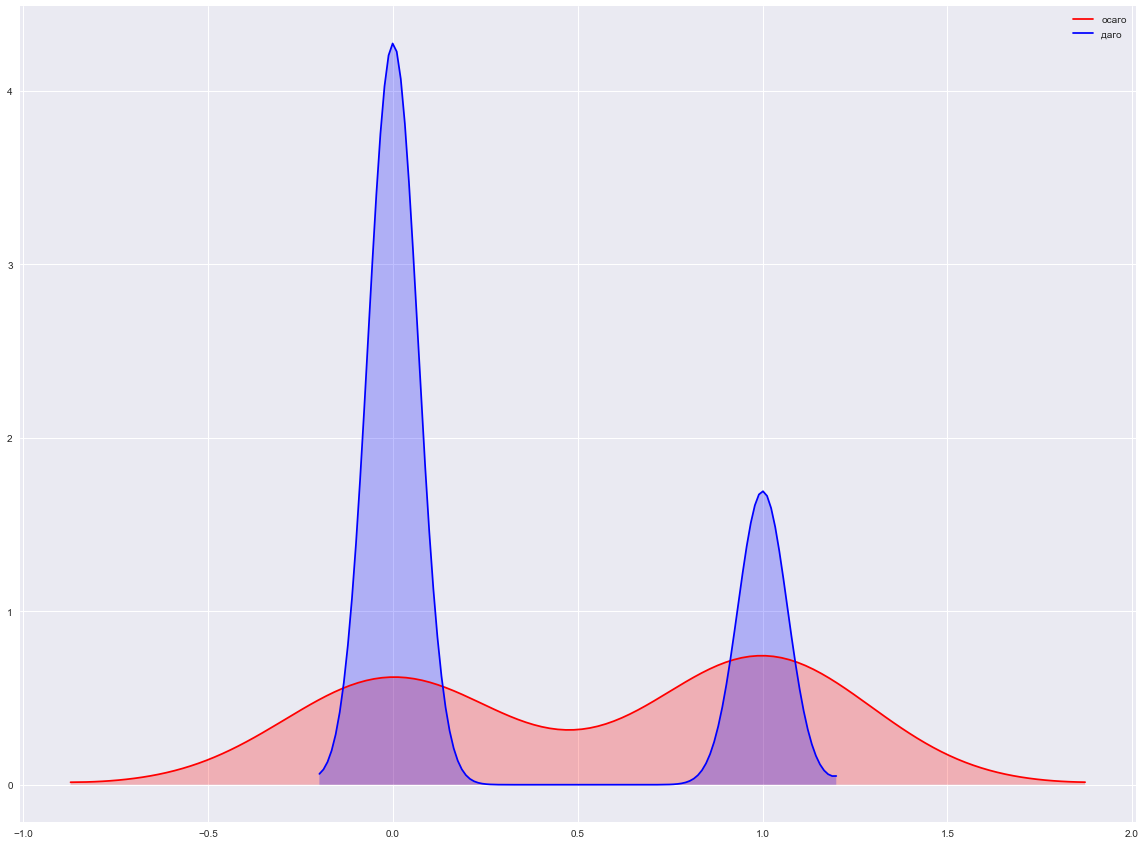

In [74]:
sns.kdeplot(df_test['CLIENT_HAS_OSAGO'][df_test.POLICY_COURT_SIGN==1], shade=True, color="r", label='осаго')
sns.kdeplot(df_test['CLIENT_HAS_DAGO'][df_test.POLICY_COURT_SIGN==0], shade=True, color="b", label='даго')

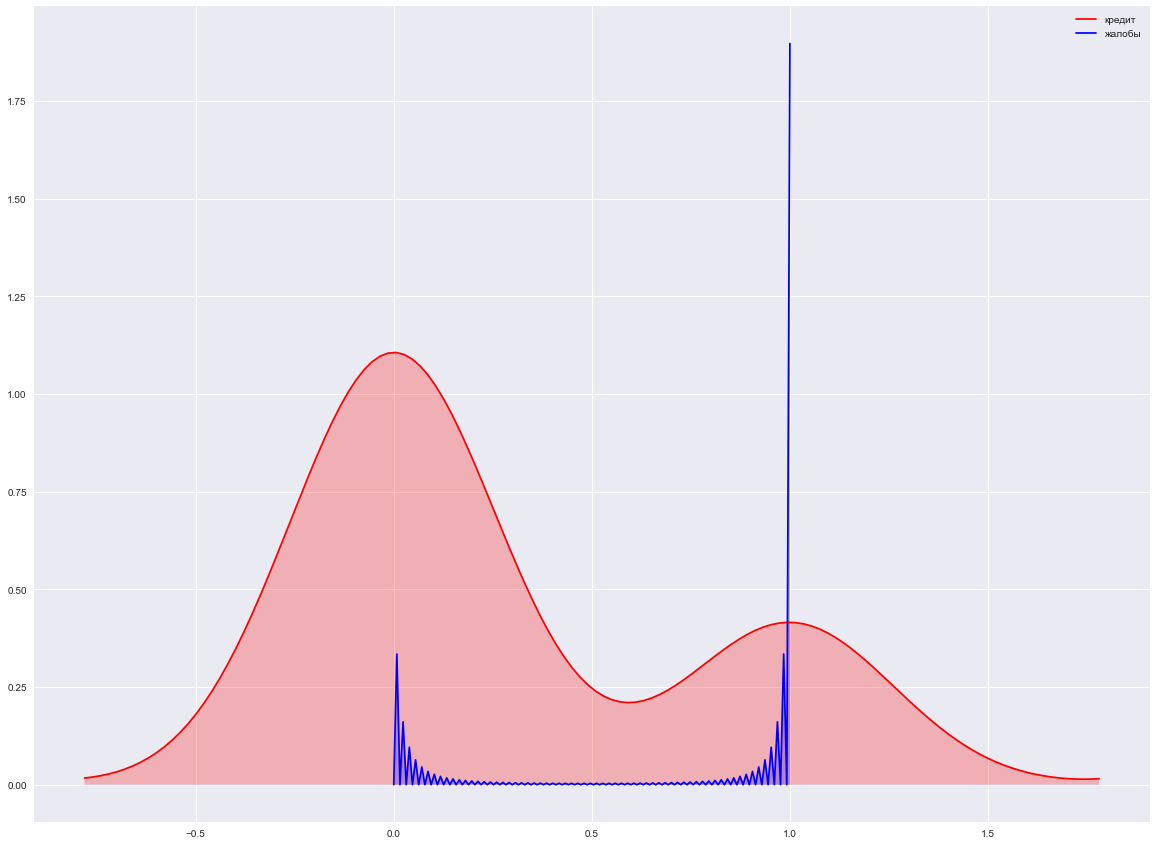

In [75]:
sns.kdeplot(df_test['VEHICLE_IN_CREDIT'][df_test.POLICY_COURT_SIGN==1], shade=True, color="r", label='кредит')
sns.kdeplot(df_test['POLICY_HAS_COMPLAINTS'][df_test.POLICY_COURT_SIGN==0], shade=True, color="b", label='жалобы')

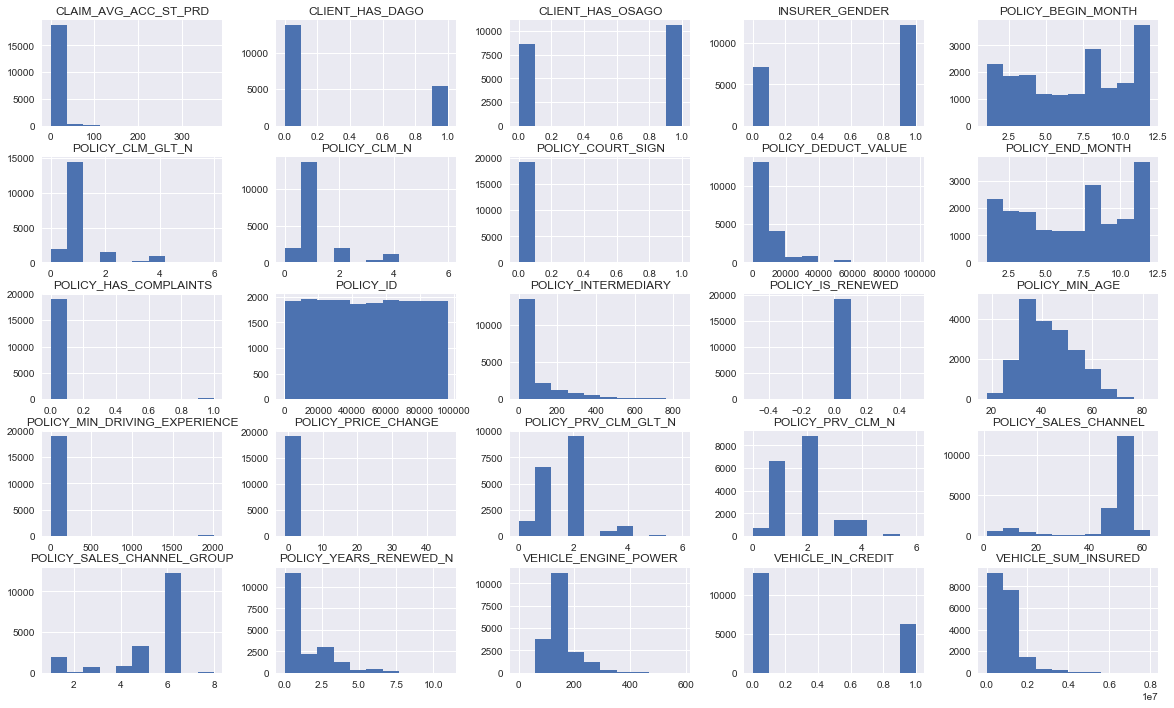

In [76]:
features = df_test.columns
df_test[features].hist(figsize=(20,12));

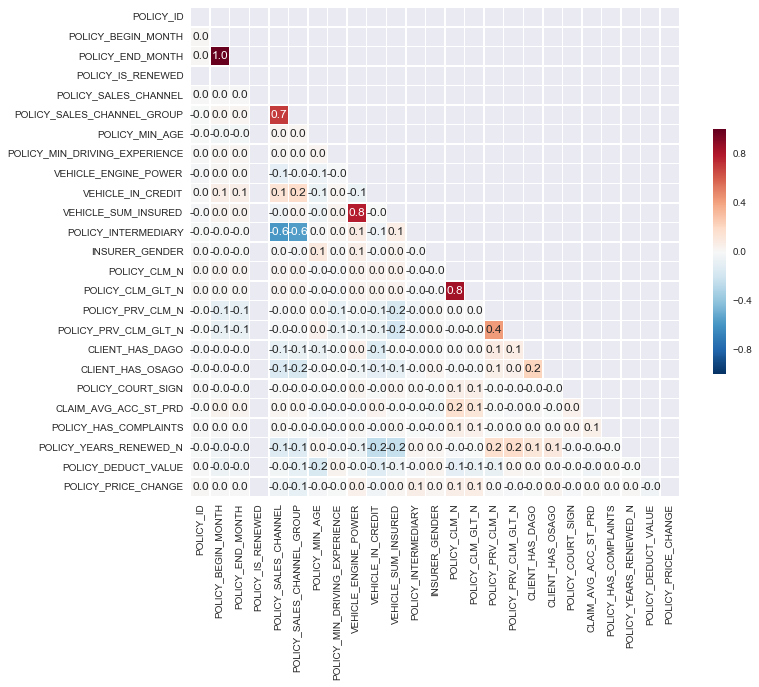

In [77]:
# Вычисляем матрицу корреляций
corr = df_test.corr(method='pearson')


mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});    

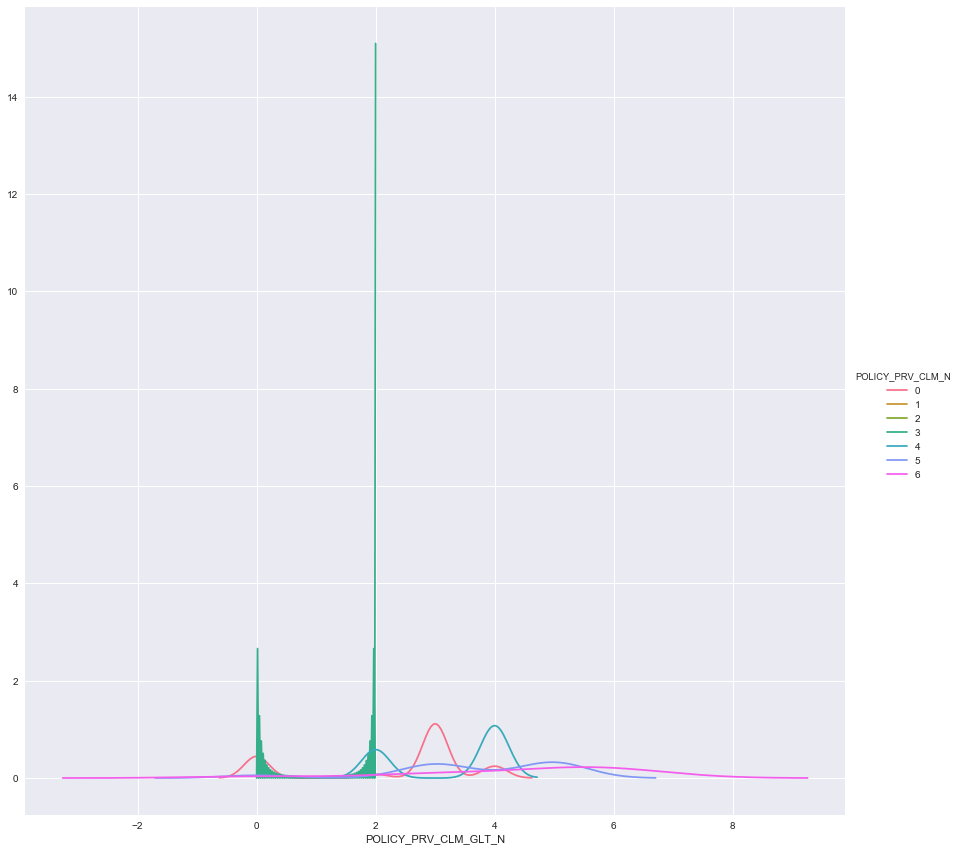

In [79]:
sns.FacetGrid(df_test, hue="POLICY_PRV_CLM_N", size=12) \
   .map(sns.kdeplot, "POLICY_PRV_CLM_GLT_N").add_legend();

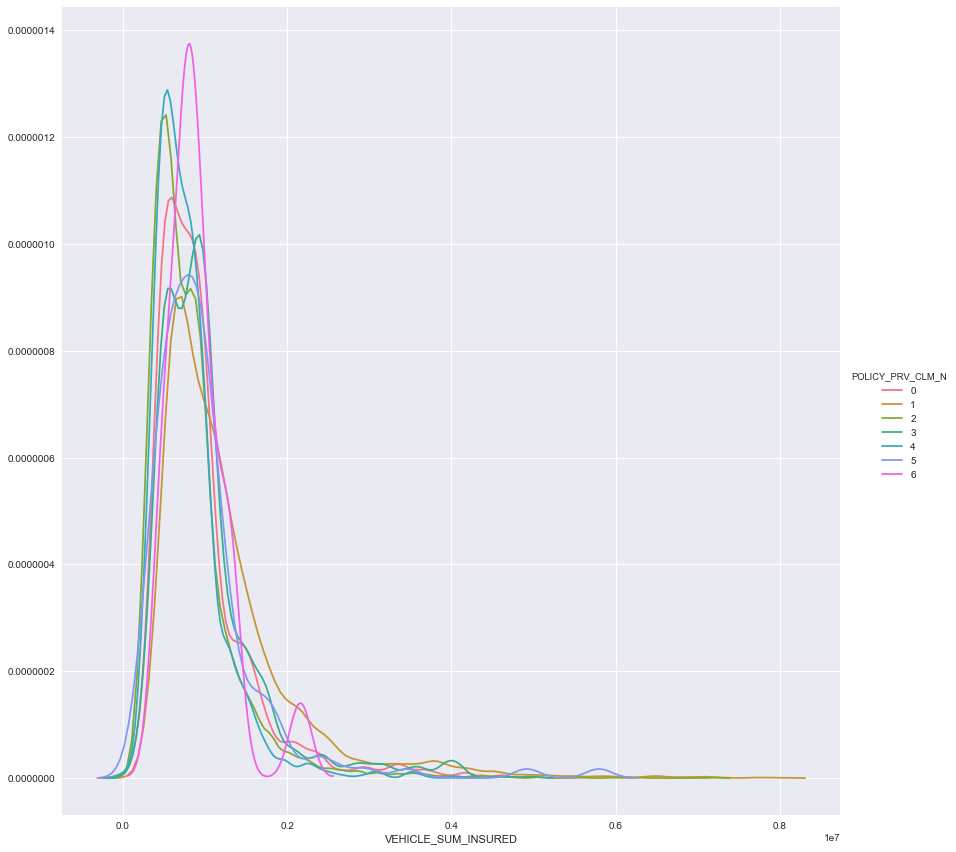

In [80]:
sns.FacetGrid(df_test, hue="POLICY_PRV_CLM_N", size=12) \
   .map(sns.kdeplot, "VEHICLE_SUM_INSURED").add_legend();

In [81]:
df_test.head()

,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_MAKE,...,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
DATA_TYPE,,,,,,,,,,,,,,,,,,,,,
TEST,48303,1,1,0,52,6,Санкт-Петербург,44,1,BMW,...,0,0,1,0,0.0,0,0,0.0,Санкт-Петербург,0.00
TEST,27162,7,7,0,52,6,Санкт-Петербург,33,2000,Skoda,...,1,0,1,0,0.0,0,1,15000.0,Санкт-Петербург,0.00
TEST,74873,11,11,0,59,3,Санкт-Петербург,36,8,Renault,...,2,0,1,0,0.0,0,2,0.0,Санкт-Петербург,0.09
TEST,27155,7,7,0,53,6,Санкт-Петербург,50,28,Toyota,...,2,0,0,0,0.0,0,3,0.0,Санкт-Петербург,0.00
TEST,27152,7,7,0,52,6,Москва,35,4,Ford,...,2,0,1,0,0.0,0,4,15000.0,Московская,0.02


In [82]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19198 entries, TEST  to TEST 
Data columns (total 29 columns):
POLICY_ID                        19198 non-null int64
POLICY_BEGIN_MONTH               19198 non-null int64
POLICY_END_MONTH                 19198 non-null int64
POLICY_IS_RENEWED                19198 non-null int64
POLICY_SALES_CHANNEL             19198 non-null int64
POLICY_SALES_CHANNEL_GROUP       19198 non-null int64
POLICY_BRANCH                    19198 non-null object
POLICY_MIN_AGE                   19198 non-null int64
POLICY_MIN_DRIVING_EXPERIENCE    19198 non-null int64
VEHICLE_MAKE                     19198 non-null object
VEHICLE_MODEL                    19198 non-null object
VEHICLE_ENGINE_POWER             19198 non-null float64
VEHICLE_IN_CREDIT                19198 non-null int64
VEHICLE_SUM_INSURED              19198 non-null float64
POLICY_INTERMEDIARY              19198 non-null int64
INSURER_GENDER                   19198 non-null int64
POLICY_CLM_N         

In [83]:
df_test["VEHICLE_SUM_INSURED"].head()

DATA_TYPE
TEST     1156200.0
TEST      890000.0
TEST      277704.0
TEST      781615.0
TEST      319545.0
Name: VEHICLE_SUM_INSURED, dtype: float64

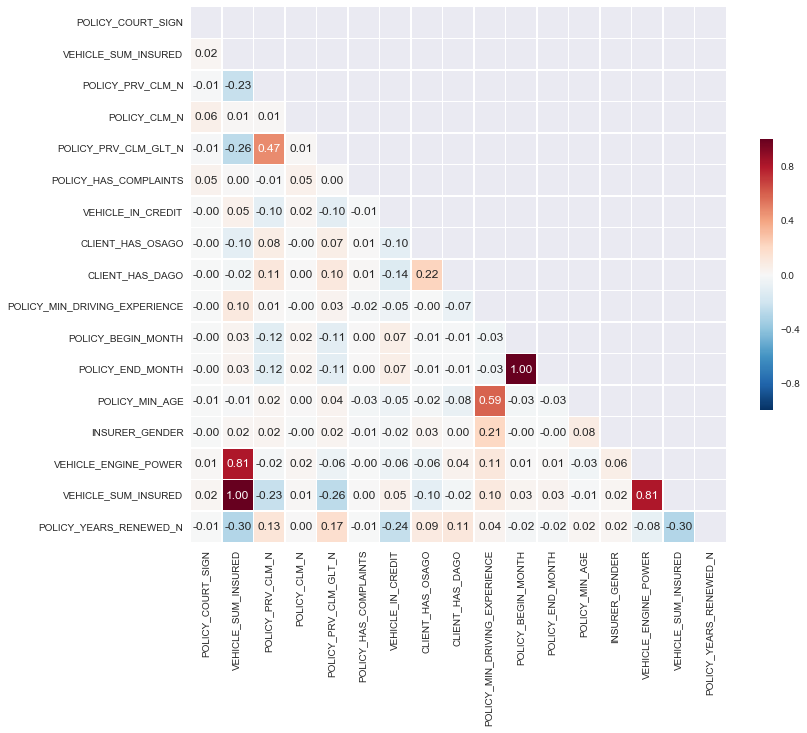

In [85]:
corr = df_test[['POLICY_COURT_SIGN', 'VEHICLE_SUM_INSURED', 'POLICY_PRV_CLM_N', 
              'POLICY_CLM_N', 'POLICY_PRV_CLM_GLT_N', 'POLICY_HAS_COMPLAINTS', 
              'VEHICLE_IN_CREDIT', 'CLIENT_HAS_OSAGO', 'CLIENT_HAS_DAGO',
               'POLICY_MIN_DRIVING_EXPERIENCE','POLICY_BEGIN_MONTH',
               'POLICY_END_MONTH', 'POLICY_MIN_AGE', 'INSURER_GENDER',
               'VEHICLE_MAKE', 'VEHICLE_ENGINE_POWER','VEHICLE_SUM_INSURED',
               'POLICY_YEARS_RENEWED_N']].corr(method='spearman')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [86]:
df_test.corr()

,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_ENGINE_POWER,VEHICLE_IN_CREDIT,...,POLICY_PRV_CLM_N,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,POLICY_PRICE_CHANGE
POLICY_ID,1.000000,0.008802,0.008000,NaN,0.005300,-0.001607,-0.004701,0.003701,-0.022531,0.000608,...,-0.000758,-0.005206,-0.009495,-0.000839,0.004933,-0.006910,0.001313,-0.004865,0.000265,0.013665
POLICY_BEGIN_MONTH,0.008802,1.000000,0.996559,NaN,0.007480,0.018241,-0.023840,0.020029,0.013679,0.070153,...,-0.089358,-0.077354,-0.010302,-0.009836,-0.003114,0.036284,0.001386,-0.039403,-0.046897,0.001180
POLICY_END_MONTH,0.008000,0.996559,1.000000,NaN,0.006937,0.017047,-0.023750,0.020229,0.013945,0.070035,...,-0.090211,-0.077726,-0.010854,-0.010327,-0.003394,0.035844,0.001701,-0.040826,-0.045965,0.001450
POLICY_IS_RENEWED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POLICY_SALES_CHANNEL,0.005300,0.007480,0.006937,NaN,1.000000,0.701374,0.020814,0.008651,-0.095495,0.136530,...,-0.011650,-0.011995,-0.079386,-0.147877,-0.001626,0.019584,0.012811,-0.125831,-0.026124,-0.047090
POLICY_SALES_CHANNEL_GROUP,-0.001607,0.018241,0.017047,NaN,0.701374,1.000000,0.020166,0.015035,-0.036849,0.182379,...,0.003435,-0.009435,-0.077948,-0.165569,-0.007437,0.016542,-0.003152,-0.131656,-0.078166,-0.085718
POLICY_MIN_AGE,-0.004701,-0.023840,-0.023750,NaN,0.020814,0.020166,1.000000,0.024635,-0.062263,-0.066266,...,0.015567,0.041032,-0.071458,-0.016080,-0.005898,-0.032440,-0.030312,0.019401,-0.164042,-0.021431
POLICY_MIN_DRIVING_EXPERIENCE,0.003701,0.020029,0.020229,NaN,0.008651,0.015035,0.024635,1.000000,-0.010927,0.021290,...,-0.085022,-0.070858,-0.030660,-0.001941,-0.003407,-0.011173,-0.010478,-0.037273,0.036804,-0.006903
VEHICLE_ENGINE_POWER,-0.022531,0.013679,0.013945,NaN,-0.095495,-0.036849,-0.062263,-0.010927,1.000000,-0.065337,...,-0.026472,-0.064193,0.047419,-0.052325,0.036333,-0.008303,0.011732,-0.066356,-0.029449,0.048028
VEHICLE_IN_CREDIT,0.000608,0.070153,0.070035,NaN,0.136530,0.182379,-0.066266,0.021290,-0.065337,1.000000,...,-0.074171,-0.074987,-0.136474,-0.100052,-0.003999,0.046744,-0.011005,-0.246238,-0.122035,-0.038478


In [87]:
df_test.corr('spearman')

,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_ENGINE_POWER,VEHICLE_IN_CREDIT,...,POLICY_PRV_CLM_N,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,POLICY_PRICE_CHANGE
POLICY_ID,1.000000,0.008992,0.008197,NaN,0.004023,-0.002638,-0.003154,-0.006938,-0.014986,0.000609,...,-0.002989,-0.004333,-0.009446,-0.000902,0.004934,0.006930,0.001289,-0.003704,0.000449,0.003473
POLICY_BEGIN_MONTH,0.008992,1.000000,0.996586,NaN,0.021800,0.026324,-0.025790,-0.032305,0.007597,0.069230,...,-0.115965,-0.106388,-0.010656,-0.009284,-0.002805,0.040214,0.001856,-0.016476,-0.059038,0.028301
POLICY_END_MONTH,0.008197,0.996586,1.000000,NaN,0.021413,0.025959,-0.025880,-0.031863,0.008002,0.069024,...,-0.117185,-0.107202,-0.011226,-0.009811,-0.003238,0.039881,0.002185,-0.017848,-0.058049,0.027800
POLICY_IS_RENEWED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POLICY_SALES_CHANNEL,0.004023,0.021800,0.021413,NaN,1.000000,0.639178,0.083879,0.032410,0.049702,0.182485,...,-0.038466,-0.061887,-0.181287,-0.223033,-0.008205,0.054125,-0.011862,-0.150996,-0.166772,-0.017941
POLICY_SALES_CHANNEL_GROUP,-0.002638,0.026324,0.025959,NaN,0.639178,1.000000,0.078343,0.013825,0.025196,0.251082,...,-0.032877,-0.051152,-0.178638,-0.219540,-0.011969,0.054785,-0.019612,-0.172560,-0.172620,-0.035575
POLICY_MIN_AGE,-0.003154,-0.025790,-0.025880,NaN,0.083879,0.078343,1.000000,0.590651,-0.033324,-0.051649,...,0.016422,0.036577,-0.075103,-0.016538,-0.006650,-0.041220,-0.030974,0.018457,-0.171870,0.064951
POLICY_MIN_DRIVING_EXPERIENCE,-0.006938,-0.032305,-0.031863,NaN,0.032410,0.013825,0.590651,1.000000,0.109720,-0.054512,...,0.013735,0.032786,-0.066071,-0.003528,-0.001242,-0.047481,-0.019534,0.038963,-0.132923,0.087454
VEHICLE_ENGINE_POWER,-0.014986,0.007597,0.008002,NaN,0.049702,0.025196,-0.033324,0.109720,1.000000,-0.055542,...,-0.022399,-0.058831,0.039948,-0.059819,0.010896,0.044445,-0.003520,-0.084400,-0.120242,0.099476
VEHICLE_IN_CREDIT,0.000609,0.069230,0.069024,NaN,0.182485,0.251082,-0.051649,-0.054512,-0.055542,1.000000,...,-0.098834,-0.103143,-0.136474,-0.100052,-0.003999,0.087267,-0.011005,-0.236243,-0.107220,-0.087975


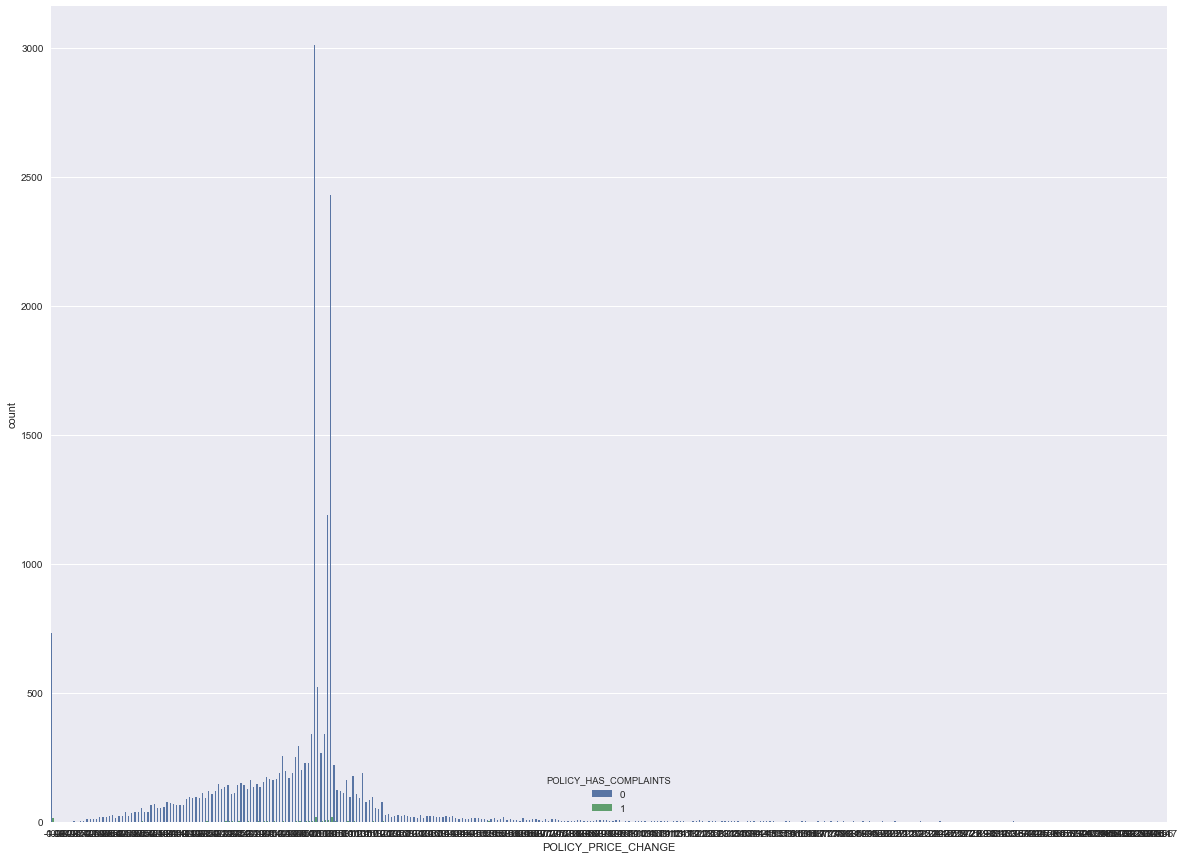

In [89]:
sns.countplot(x="POLICY_PRICE_CHANGE", hue='POLICY_HAS_COMPLAINTS', data=df_test);

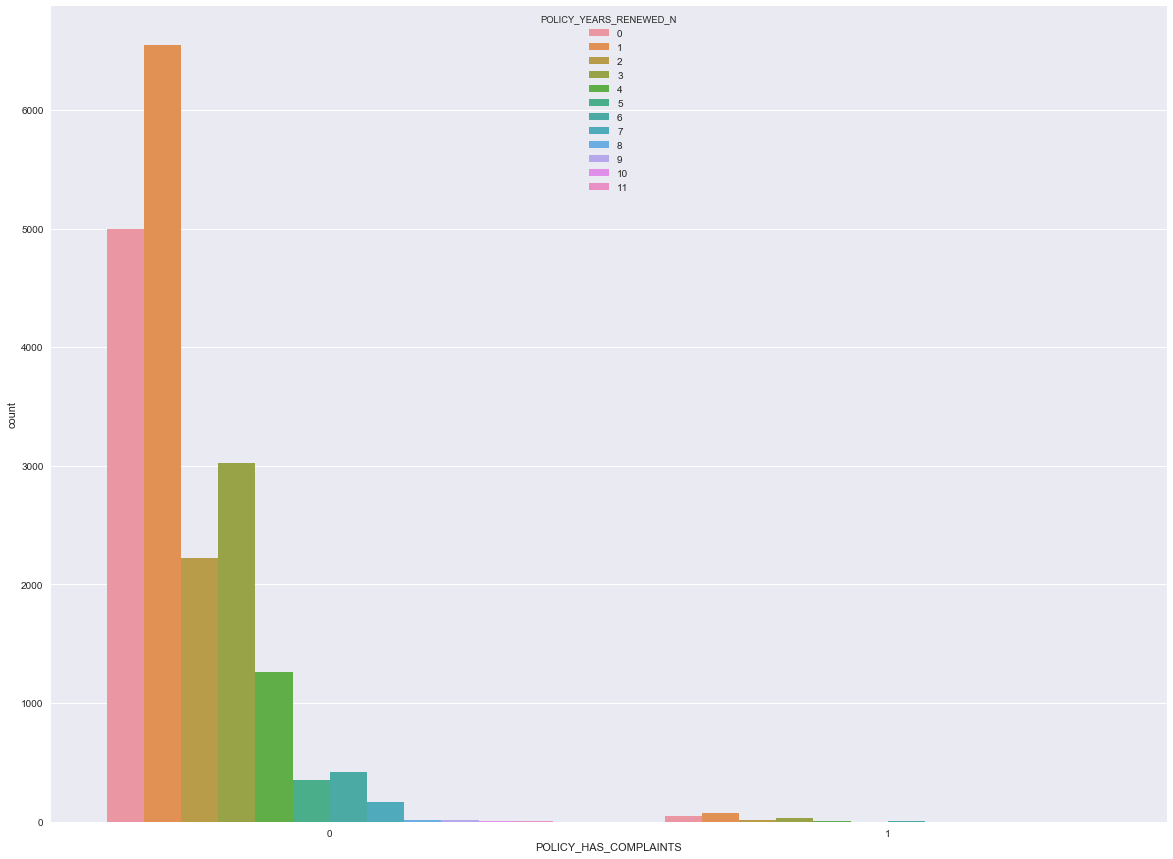

In [90]:
sns.countplot(x="POLICY_HAS_COMPLAINTS", hue='POLICY_YEARS_RENEWED_N', data=df_test);

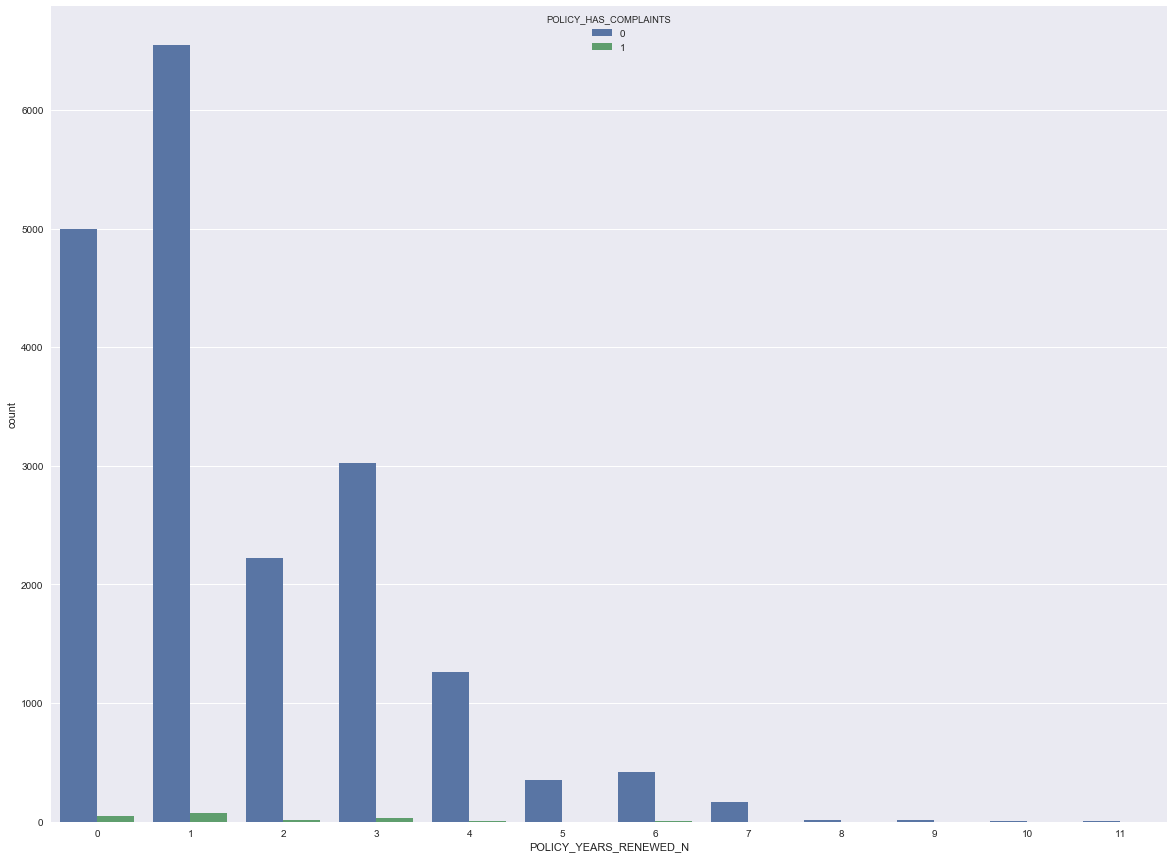

In [91]:
sns.countplot(x="POLICY_YEARS_RENEWED_N", hue='POLICY_HAS_COMPLAINTS', data=df_test);

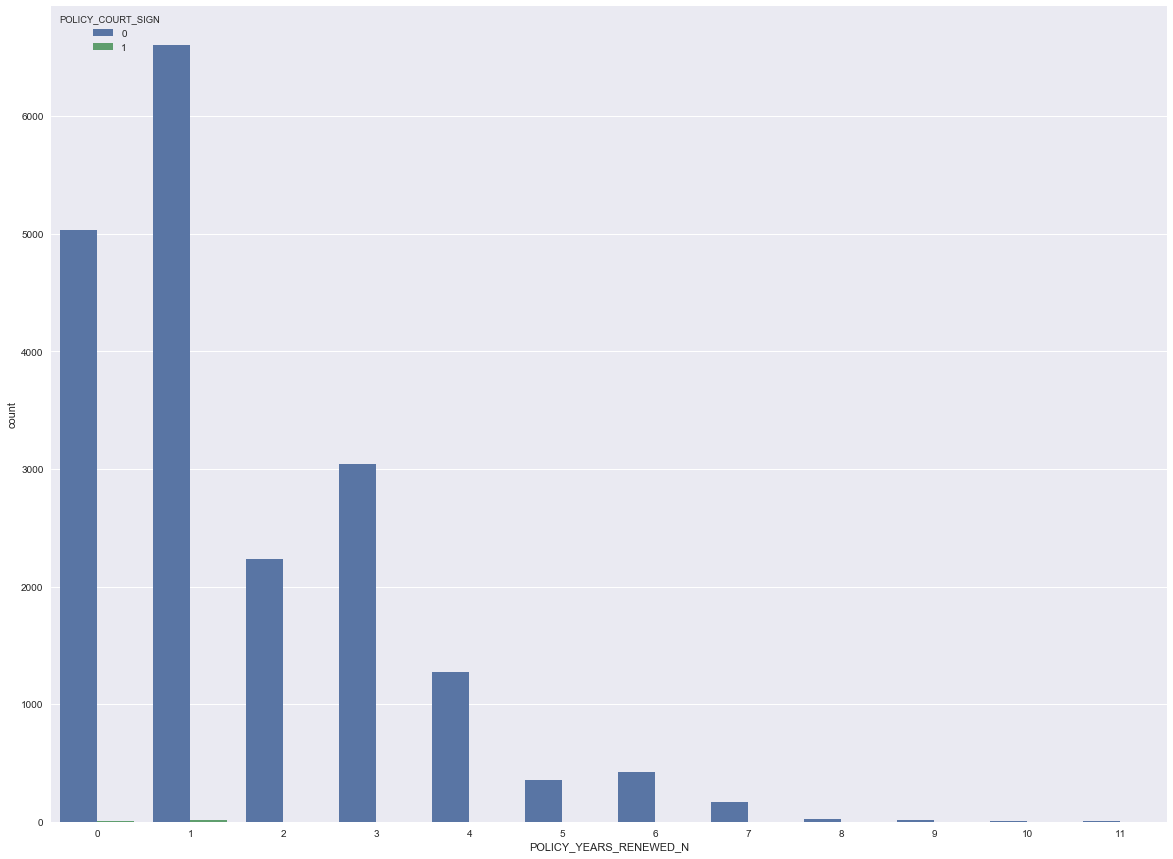

In [92]:
sns.countplot(x="POLICY_YEARS_RENEWED_N", hue='POLICY_COURT_SIGN', data=df_test);

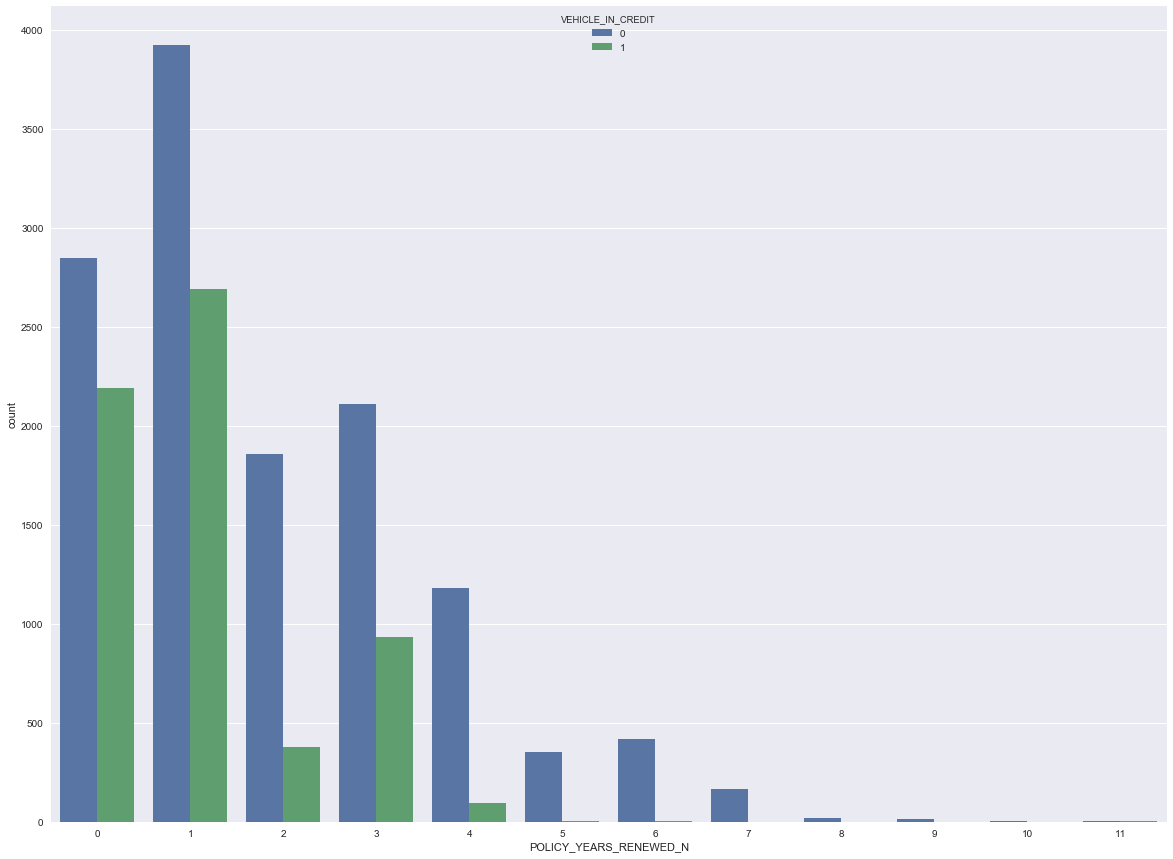

In [93]:
sns.countplot(x="POLICY_YEARS_RENEWED_N", hue='VEHICLE_IN_CREDIT', data=df_test);

In [ ]:
Superior - посчитано заранее, известно как факт.
    POLICY_PRICE_CHANGE
    
Внутрь скобок:
    POLICY_COURT_SIGN POLICY_HAS_COMPLAINTS VEHICLE_IN_CREDIT первым порядоком приоритета 
    POLICY_HAS_COMPLAINTS POLICY_YEARS_RENEWED_N POLICY_CLM_N вторым порядоком приоритета 
    
Обернуть влиянием:
   VEHICLE_SUM_INSURED VEHICLE_ENGINE_POWER VEHICLE_IN_CREDIT первая степень влияния 
   INSURER_GENDER POLICY_MIN_AGE POLICY_MIN_DRIVING_EXPERIENCE вторая степень влияния
    
Обернуть влиянием:
   VEHICLE_MAKE VEHICLE_MODEL
   CLIENT_REGISTRATION_REGION
   POLICY_BRANCH INSURER_GENDER
   POLICY_MIN_DRIVING_EXPERIENCE 
   POLICY_INTERMEDIARY POLICY_MIN_AGE

Попробовать вычесть: - "кризис, денег на продление каско нет, продлю осаго и сэкономлю" 
  CLIENT_HAS_OSAGO, CLIENT_HAS_DAGO 

Остально нафиг, все str в label encoder и в два датафрейма:
    один с географией.
    второй с машинами.
    
Ну, няши мои ненаглядные, я как бы намекаю что в датасете есть:
    частично закодированная инфа - где и как продавали полис
    незакодированная инфа о марки и модели автомобиля
    
    если и то и то кодировать labelencoder в np.array то будет не айс.
    поэтому, что бы железная машина не путалась в 100500 циферках, надо:
    - эти цифирки разделить в простанстве по сути происходящего процесса.

Всё таки визуальный анализ - полезная вещь. оставлю как пример на будущее.